In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
from IPython import get_ipython



In [2]:
df=pd.read_csv('source_data/heart.csv')

In [3]:
chest_pain=pd.get_dummies(df['cp'],prefix='cp',drop_first=True)
df=pd.concat([df,chest_pain],axis=1)
df.drop(['cp'],axis=1,inplace=True)
sp=pd.get_dummies(df['slope'],prefix='slope')
th=pd.get_dummies(df['thal'],prefix='thal')
rest_ecg=pd.get_dummies(df['restecg'],prefix='restecg')
frames=[df,sp,th,rest_ecg]
df=pd.concat(frames,axis=1)
df.drop(['slope','thal','restecg'],axis=1,inplace=True)

In [4]:
X = df.drop(['target'], axis = 1)
y = df.target.values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
from sklearn.ensemble import RandomForestClassifier
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)


In [8]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_c=GradientBoostingClassifier(n_estimators=100,max_depth=1, random_state=0)
gbm_c.fit(X_train,y_train)
gbm_pred=gbm_c.predict(X_test)

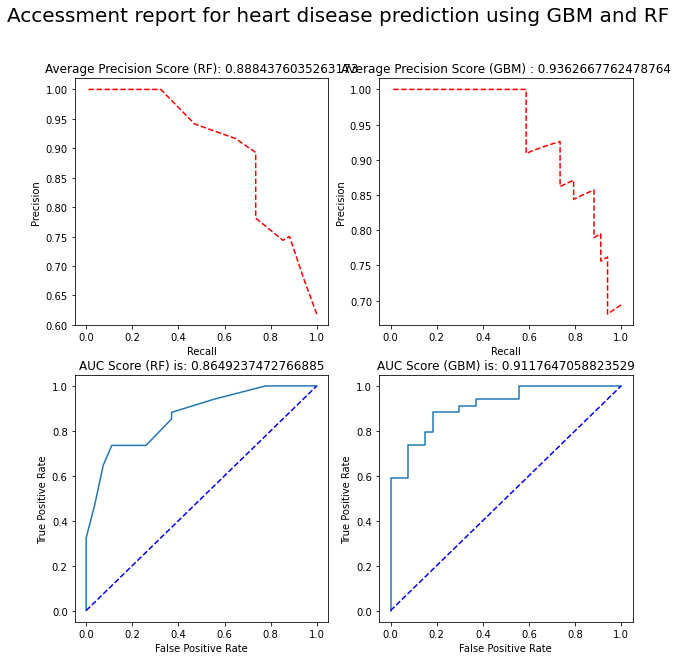

In [9]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
%matplotlib inline

fig,ax=plt.subplots(2,2,figsize=(10,10))
fig.suptitle('Accessment report for heart disease prediction using GBM and RF  ', fontsize=20)
precision,recall,threshold = precision_recall_curve(y_test,rdf_c.predict_proba(X_test)[:,1])
ax[0,0].plot(recall,precision,'r--',color='red')
ax[0,0].set_xlabel('Recall')
ax[0,0].set_ylabel('Precision')
ax[0,0].set_title("Average Precision Score (RF): {}".format(average_precision_score(y_test,rdf_c.predict_proba(X_test)[:,1])))
fpr,tpr,threshold = roc_curve(y_test,rdf_c.predict_proba(X_test)[:,1])
ax[1,0].plot(fpr,tpr)
ax[1,0].set_title("AUC Score (RF) is: {}".format(auc(fpr,tpr)))
ax[1,0].plot([0,1],[0,1],'r--',color="blue")
ax[1,0].set_xlabel('False Positive Rate')
ax[1,0].set_ylabel('True Positive Rate')
precision,recall,threshold = precision_recall_curve(y_test,gbm_c.predict_proba(X_test)[:,1])
ax[0,1].plot(recall,precision,'r--',color='red')
ax[0,1].set_xlabel('Recall')
ax[0,1].set_ylabel('Precision')
ax[0,1].set_title("Average Precision Score (GBM) : {}".format(average_precision_score(y_test,gbm_c.predict_proba(X_test)[:,1])))
fpr,tpr,threshold = roc_curve(y_test,gbm_c.predict_proba(X_test)[:,1])
ax[1,1].plot(fpr,tpr)
ax[1,1].set_title("AUC Score (GBM) is: {}".format(auc(fpr,tpr)))
ax[1,1].plot([0,1],[0,1],'r--',color="blue")
ax[1,1].set_xlabel('False Positive Rate')
ax[1,1].set_ylabel('True Positive Rate')
fig.savefig('full_figure.pdf')